### Prédiction des couts d'assurance medicale
Ce dataset contient des informations sur les primes d'assurance médicale pour un groupe de personnes, ainsi que des détails démographiques et des informations sur la santé de ces personnes.

L'objectif est mettre en place un modele predictif capable de predire les couts des primes à l'avenir.

vous utilisez comme Target la variables **Charges**

### Comprehension des variables du dataset
    
**Âge :** L'âge de chaque individu assuré.

**Sexe :** Le genre.

**IMC (bmi) (Indice de Masse Corporelle) :** Il s'agit d'une mesure de la corpulence basée sur la taille et le poids.

**Nombre d'enfants :** Le nombre d'enfants/à charge couverts par l'assurance.

**Fumeur :** Une variable binaire indiquant si l'individu est fumeur ou non.

**Région :** La région géographique de résidence de l'assuré.

**Charges :** Les coûts de l'assurance médicale pour chaque individu.

**Importation des librairies et du DataSet**

In [2]:
# import des libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# lire le dataset dans la variables df
df = pd.read_csv('insurance.csv')

### Exploratory Data Analysis (EDA) : Exploration Analyse de données

In [4]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
# renommez tous les noms de colonnes 

nouvelles_colonnes = ['age','sex', 'imc ', 'enfants', 'fumeur', 'region', 'charges']

df.columns = nouvelles_colonnes

In [6]:
print('Dimensions: {} lignes and {} Colonnes '.format(df.shape[0], df.shape[1]))

Dimensions: 1338 lignes and 7 Colonnes 


In [7]:
# Statistique Descriptives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
imc,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
enfants,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# info sur chaque variable

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   sex      1338 non-null   object 
 2   imc      1338 non-null   float64
 3   enfants  1338 non-null   int64  
 4   fumeur   1338 non-null   object 
 5   region   1338 non-null   object 
 6   charges  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Verifions les Valeurs Nulles**

In [9]:
df.isnull().sum()

age        0
sex        0
imc        0
enfants    0
fumeur     0
region     0
charges    0
dtype: int64

Notre dataframe ne présente aucunes valeurs manquantes.

In [9]:
df['fumeur'].value_counts()

fumeur
no     1064
yes     274
Name: count, dtype: int64

La majorité des patients sont pas des fumeurs

### Visualisations Des Données.

**Analyse Univariée**

Text(0.5, 1.0, 'Age vs Charges')

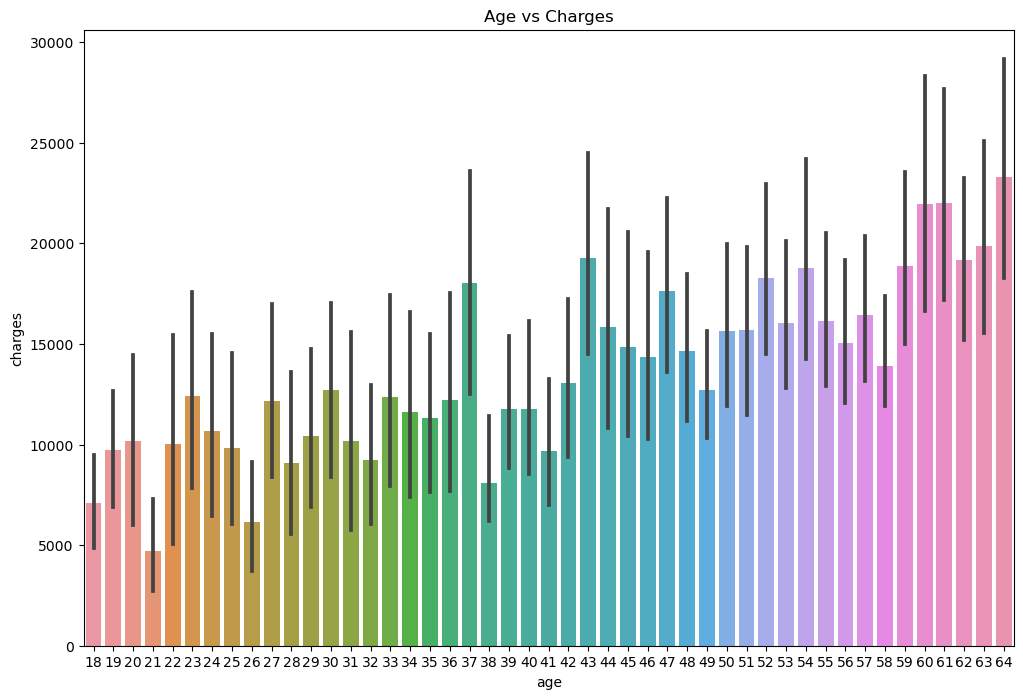

In [10]:
# Age vs Charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = df)

plt.title("Age vs Charges")

Interpretation : 
Les frais d'assurance seront élevés en fonction de l'age de la personne.

Text(0.5, 1.0, 'sex vs charges')

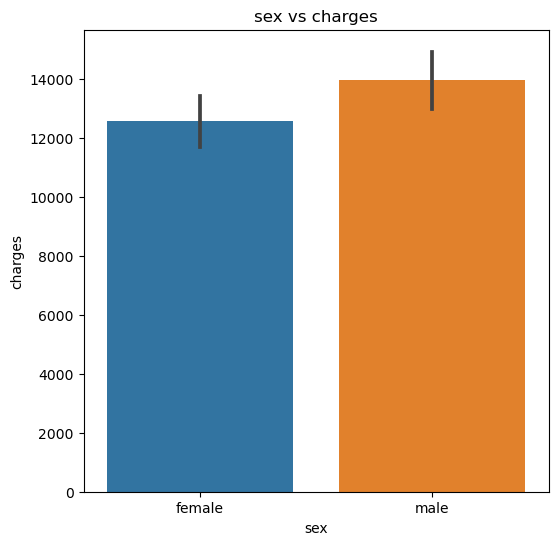

In [11]:
# sex vs charges
plt.figure(figsize = (6, 6))

sns.barplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')

Interprétation : 

L'assurance des hommes coûte plus cher que celle des femmes.

Text(0.5, 1.0, 'fumeur vs charges')

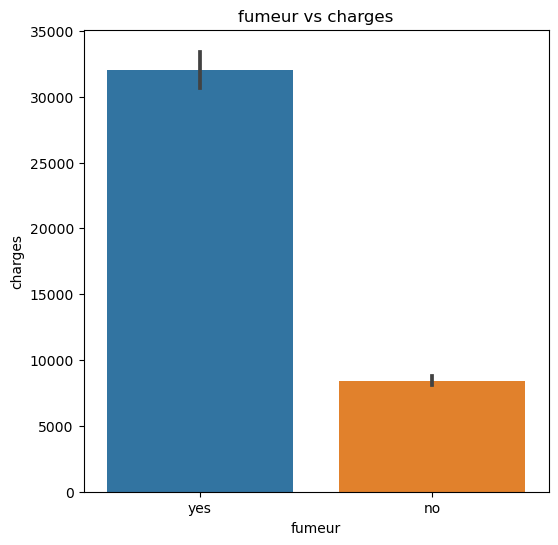

In [12]:
# fumeur vs charges
plt.figure(figsize = (6, 6))
sns.barplot(x = 'fumeur', y = 'charges', data = df)

plt.title('fumeur vs charges')

Interpretation :

les fumeurs ont plus de frais d'assurance que les non-fumeurs

Text(0.5, 1.0, 'region vs charges')

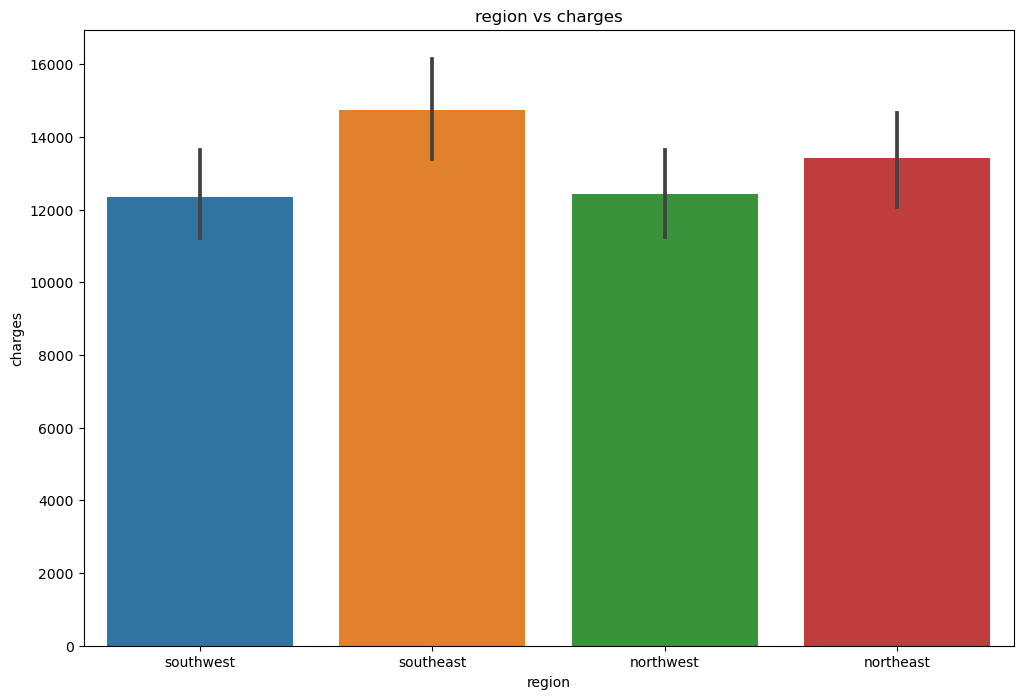

In [13]:
# region vs charges
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = df)

plt.title('region vs charges')

La région ne joue en fait aucun rôle dans la détermination des frais d'assurance.

#### Correlation Plot

In [11]:
df_numerique = df.select_dtypes(include=['int', 'float'])
df_numerique.corr()

,age,imc,enfants,charges
age,1.000000,0.109272,0.042469,0.299008
imc,0.109272,1.000000,0.012759,0.198341
enfants,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


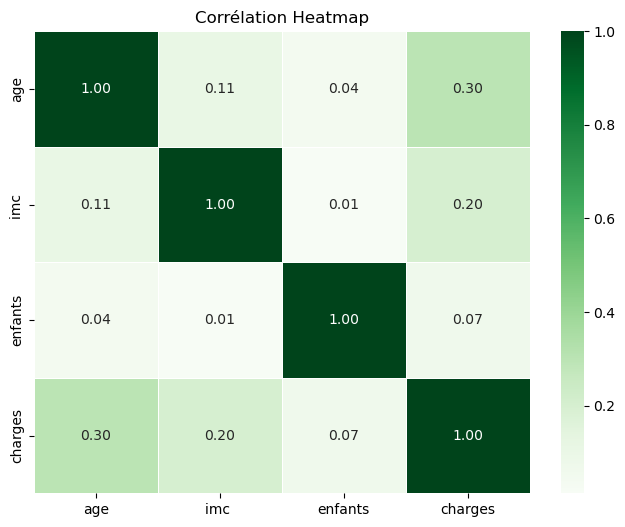

In [12]:
# Calculer la matrice de corrélation
corr_matrix = df_numerique.corr()

# Créer une carte thermique de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title('Corrélation Heatmap')
plt.show()

### Data Preprocessing / Clean the Data

In [13]:
# suppression des colonnes inutiles
df = df.drop('region', axis = 1)

In [17]:
# Vérification du df apré suppression 
df.head()

,age,sex,imc,enfants,fumeur,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


**Conversion des Variables Categoriques en Variables Numeriques**

In [19]:
# Label Encoding pour sex and smoker

# importe label encoder
from sklearn.preprocessing import LabelEncoder

# creation de label encoder
le = LabelEncoder()

In [20]:
# label encoding pour sexe
# 0 pour femmes et 1 pour les hommes
df['sex'] = le.fit_transform(df['sex'])

In [21]:
# label encoding pour smoker
# 0 pour les fumeurs and 1 pour non fumeurs
df['fumeur'] = le.fit_transform(df['fumeur'])

In [22]:
# affichez lke nombre de personnes de sexe feminins et hommes
df['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [23]:
# affichez le nombre de fumeur de sexe feminins et hommes
df['fumeur'].value_counts()

fumeur
0    1064
1     274
Name: count, dtype: int64

## Modelisation

In [24]:
# Selection des variables Independentes & Dependentes (Target) variables
X = df.drop(columns = ['charges'])

y = df['charges']

In [25]:
print(X.shape)

X.sample(2)

(1338, 5)


,age,sex,imc,enfants,fumeur
60,43,1,27.36,3,0
871,26,0,29.48,1,0


In [26]:
print(y.shape)

y.tail(2)

(1338,)


1336     2007.9450
1337    29141.3603
Name: charges, dtype: float64

#### Separation du  dataset en Training Set and Test Set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 1)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


#### Entrainer le Model et Realiser la prediction

#### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

# création du model
lrmodel = LinearRegression()

# entrainons le modele
lrmodel.fit(X_train, y_train)

# prediction sur les données de test
y_pred = lrmodel.predict(X_test)

**Evaluons le modele**

In [30]:
# Calcul du MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mae : {:.2f}'.format(mae))

Mae : 4037.95


#### Support Vector Machine

In [31]:
from sklearn.svm import SVR

# créez le modele
svrmodel = SVR()

# entrainez le modele
svrmodel.fit(X_train, y_train)

# prediction sur les données de test
y_pred = svrmodel.predict(X_test)

### Evaluez le Modele avec les Métriques d'évaluation

In [33]:
from sklearn.metrics import r2_score


# Calcul du MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE : {:.2f}'.format(mae))

# Calcule le r2 score
R2 = r2_score(y_test, y_pred)
print('R2 : {:.2f}'.format(R2))

MAE : 8279.77
R2 : -0.12


#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

# creéation du model
dtrmodel = DecisionTreeRegressor()

# transmettre les données d'entraînement au modèle
dtrmodel.fit(X_train, y_train)

# prédire les résultats de l'ensemble de tests
y_pred = dtrmodel.predict(X_test)

#### Evaluez le Modele Avec les Metriques d'evaluation

In [35]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE : {:.2f}'.format(mae))

# Calcule le r2 score
R2 = r2_score(y_test, y_pred)
print('R2 : {:.2f}'.format(R2))

MAE : 3275.35
R2 : 0.69


#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
#rfrmodel = RandomForestRegressor()
rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
rfrmodel.fit(X_train, y_train)

# predicting the test set results
y_pred = rfrmodel.predict(X_test)

### Evaluez le modele en utilisant les métrique d'évaluation

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE : {:.2f}'.format(mae))

# Calcule le r2 score
R2 = r2_score(y_test, y_pred)
print('R2 : {:.2f}'.format(R2))

MAE : 2366.25
R2 : 0.88


*Nous retenons le medole effectué avec le Random Forest avec  un mae : 2400.*